In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read CSV of Olympic History
athlete = pd.read_csv('athlete_events.csv')

In [3]:
#Filter summer olympics
summer=athlete[athlete['Season'] == 'Summer']

In [4]:
#Create a list with all the hosting cities
hosts=(
    summer
    .groupby('Year')['City']
    .unique()
)
hosts=list(hosts)
cities_hosting = []
for host in hosts:
    cities_hosting.append(host[0])
    
# cities_hosting

In [5]:
#Create 3 different datasets to create de Olympic Table
summer_gold_winners=summer[summer['Medal']=='Gold']
summer_silver_winners=summer[summer['Medal']=='Silver']
summer_bronze_winners=summer[summer['Medal']=='Bronze']

In [6]:
#Bronze medals
bronze = (
    summer_bronze_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

)

bronze=bronze.rename(columns = {'Event':'Bronze'})

medals_guia = bronze.drop('Bronze',axis=1)

In [7]:
#Silver medals
silver=(
    summer_silver_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

silver=silver.rename(columns = {'Event':'Silver'})

keys = list(medals_guia.columns.values)
i1 = silver.set_index(keys).index
i2 = medals_guia.set_index(keys).index
silver_guia=silver[i1.isin(i2)]
silver_guia=silver_guia.reset_index(drop=True)
# medals_silver_guia

In [8]:
#Gold medals
gold = (
    summer_gold_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)
    # .sort_values(by='Gold')
    # .head(200)
    # .reset_index(drop=True)
    # .groupby('Year')
)

gold=gold.rename(columns = {'Event':'Gold'})

keys = list(medals_guia.columns.values)
i1 = gold.set_index(keys).index
i2 = medals_guia.set_index(keys).index
gold_guia=gold[i1.isin(i2)]
gold_guia=gold_guia.reset_index(drop=True)

In [9]:
#Medal table through all the olympic summer games
medallero=(
    bronze
    .merge(silver_guia,on=['Year','NOC'],how='outer')
    .fillna(0)
    .merge(gold_guia,on=['Year','NOC'],how='outer')
    .fillna(0)
    .sort_values(by=['Year','Gold','Silver','Bronze'],ascending=False)
)

In [10]:
#Rename de columns and reset index
cols = ['Year','NOC','Gold','Silver','Bronze']
medallero=medallero[cols]
medallero=medallero.reset_index(drop=True)

In [11]:
#Fix integer type to new columns
medallero['Silver']=medallero['Silver'].astype(int)
medallero['Gold']=medallero['Gold'].astype(int)

In [12]:
#Years of the summer olympics
years=(
    medallero['Year']
    .unique()
)

In [13]:
#Create our final dataframe with information of all the olympics through time, and ranking it
arr_df_aux=[]
for year in years:
    df_aux= medallero[medallero['Year']==year].copy()
    valor=np.arange(1,len(df_aux)+1)
    df_aux['Ranking']=valor
    arr_df_aux.append(df_aux)


medallero_verano_ranking=pd.concat(arr_df_aux)

In [14]:
#List of all the countries that had held an olympic summer game
Paises_organizadores = ['Greece','France','United States','Great Britain','Sweden','Belgium','Netherlands','Germany',
                       'West Germany', 'East Germany','Finland','Australia','Italy','Japan','Mexico','Canada',
                       'USSR','Russia','South Korea','Spain','China','Brazil']

In [15]:
#List of all the keys of the countries that had held an olympic summer game
pais_org_NOC = ['GRE','FRA','USA','GBR','SWE','BEL','NED','GER',
                'FRG','GDR','FIN','AUS','ITA','JPN','MEX','CAN',
                'USR','RUS','KOR','ESP','CHN','BRA']

In [16]:
#Top3 finalists per olympic game
top3_historic=(
    medallero_verano_ranking
    .groupby('Year')
    .head(3)
)
 
years_lst=list(years)
years_aux= []
for x in reversed(years_lst):
    years_aux.append(x)
years_lst=years_aux

In [17]:
#Winners of the olympics
ganadores=(
    medallero_verano_ranking
    .groupby('Year')
    .head(1)
)

In [18]:
#Adecuations of the winners table
winners=pd.DataFrame(ganadores.groupby('NOC').count().sort_values(by=('Year'),ascending=False).loc[:,'Year']).reset_index()
winners.iloc[1,1]=7
winners=winners.drop(4)
winners=winners.reset_index(drop=True)
winners['Team']=['United States','URSS','France','China','Great Britain','Germany']

In [19]:
winners

,NOC,Year,Team
0,USA,17,United States
1,URS,7,URSS
2,FRA,2,France
3,CHN,1,China
4,GBR,1,Great Britain
5,GER,1,Germany


In [20]:
#List of all the keys of countries on the top3, and their performance through the years
winners_labels=(
    winners['NOC'].unique()
)

rankings=[]


for pais in ['USA', 'URS','FRA', 'CHN', 'GBR']:
    df_aux=top3_historic[top3_historic['NOC']==pais].loc[:,['Year','Ranking']]

    years_aux=list(df_aux['Year'])
    lista_aux=[]
    for year in years_lst:
        if(year in years_aux):
            valor=df_aux.loc[df_aux['Year'] == year]['Ranking'].iloc[0]
            lista_aux.append(valor)
        else:
            lista_aux.append(4)
    rankings.append(lista_aux)



In [21]:
#Adding Positions of Rusia to USSR
rankings[1][22]=1
rankings[1][23]=2
rankings[1][24]=2
rankings[1][25]=3
rankings[1][26]=3
rankings[1][27]=4
rankings[1][28]=4

In [22]:
winners_labels

array(['USA', 'URS', 'FRA', 'CHN', 'GBR', 'GER'], dtype=object)

## Plotting

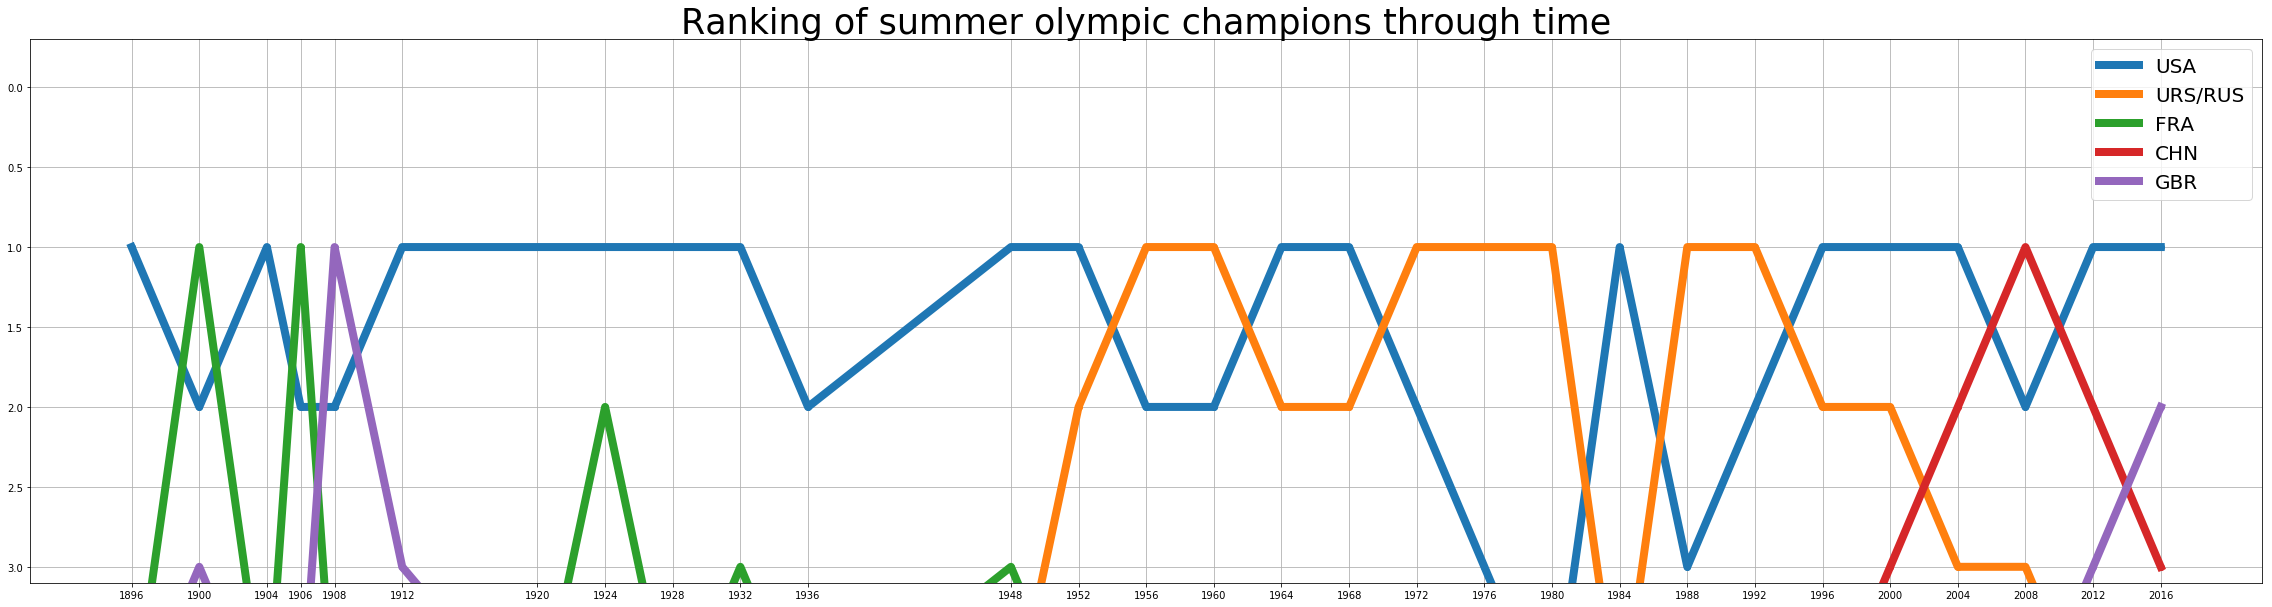

In [23]:
#Plot of the top 3 finish positions of 5 olympic summer winners
plt.figure(figsize=(40,10))

for rank in rankings:
    plt.plot(years,list(reversed(rank)),'-o',linewidth=8.0)

plt.legend(['USA', 'URS/RUS','FRA', 'CHN', 'GBR'], loc='upper right',fontsize= 20)
plt.ylim((-0.3,3.1))
plt.xticks(years)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Ranking of summer olympic champions through time',fontsize= 35)
plt.show()

## Hosts

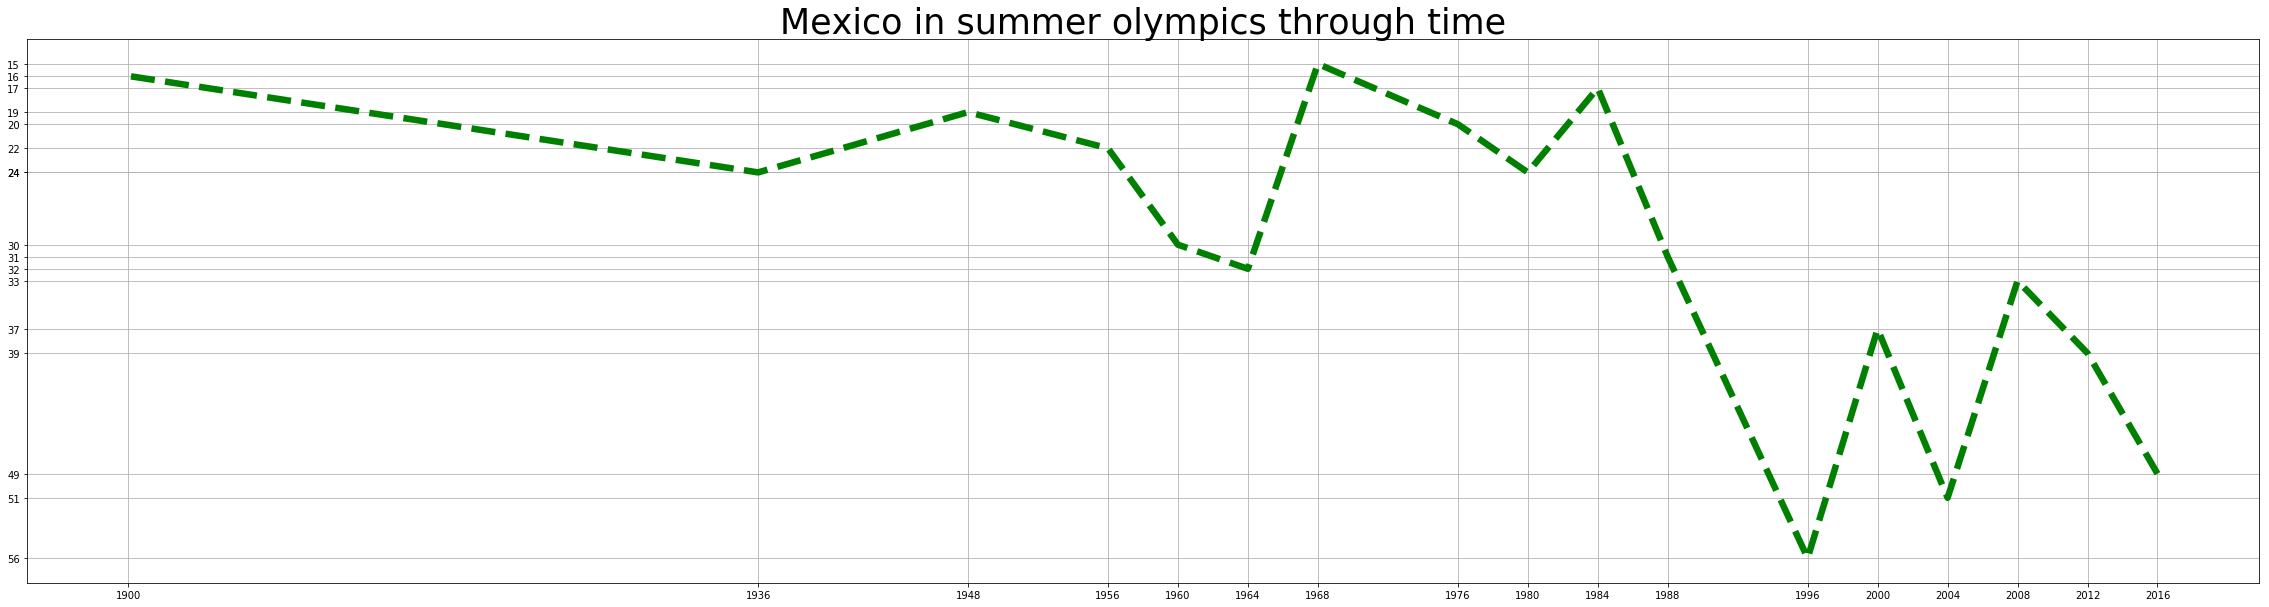

In [28]:
#MEXICO
Hist_Mex=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='MEX']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_Mex.index,Hist_Mex.values,'--',color='green',linewidth=6.5)
plt.xticks(Hist_Mex.index)
plt.yticks(Hist_Mex.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Mexico in summer olympics through time',fontsize= 35)
plt.show()

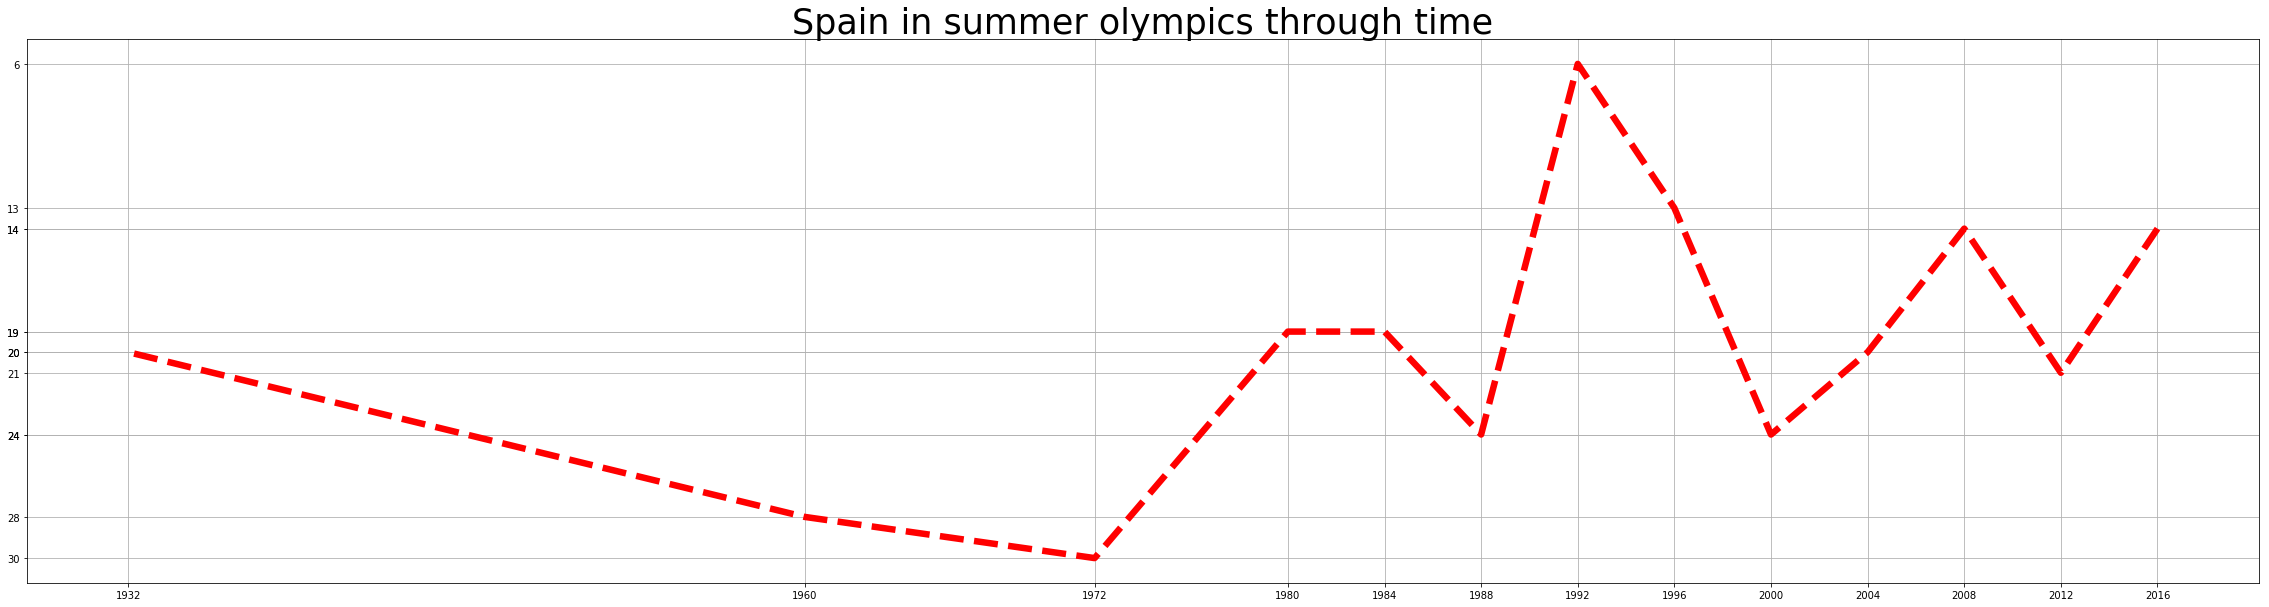

In [29]:
#Spain
Hist_Spain=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='ESP']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_Spain.index,Hist_Spain.values,'--',color='red',linewidth=6.5)
plt.xticks(Hist_Spain.index)
plt.yticks(Hist_Spain.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Spain in summer olympics through time',fontsize= 35)
plt.show()

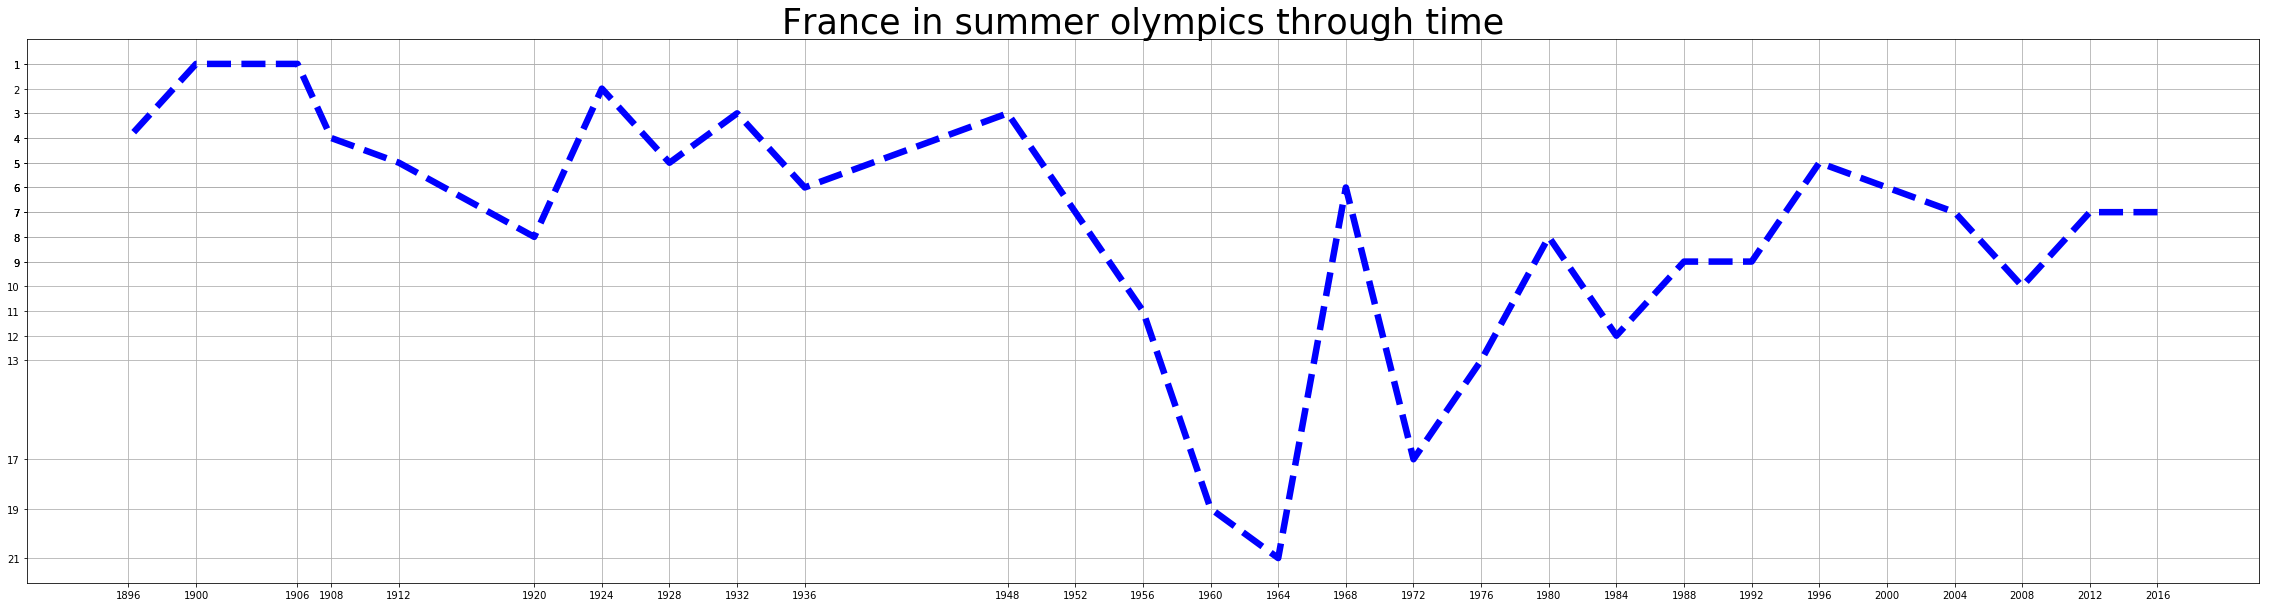

In [30]:
#France
Hist_France=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='FRA']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_France.index,Hist_France.values,'--',color='blue',linewidth=6.5)
plt.xticks(Hist_France.index)
plt.yticks(Hist_France.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('France in summer olympics through time',fontsize= 35)
plt.show()

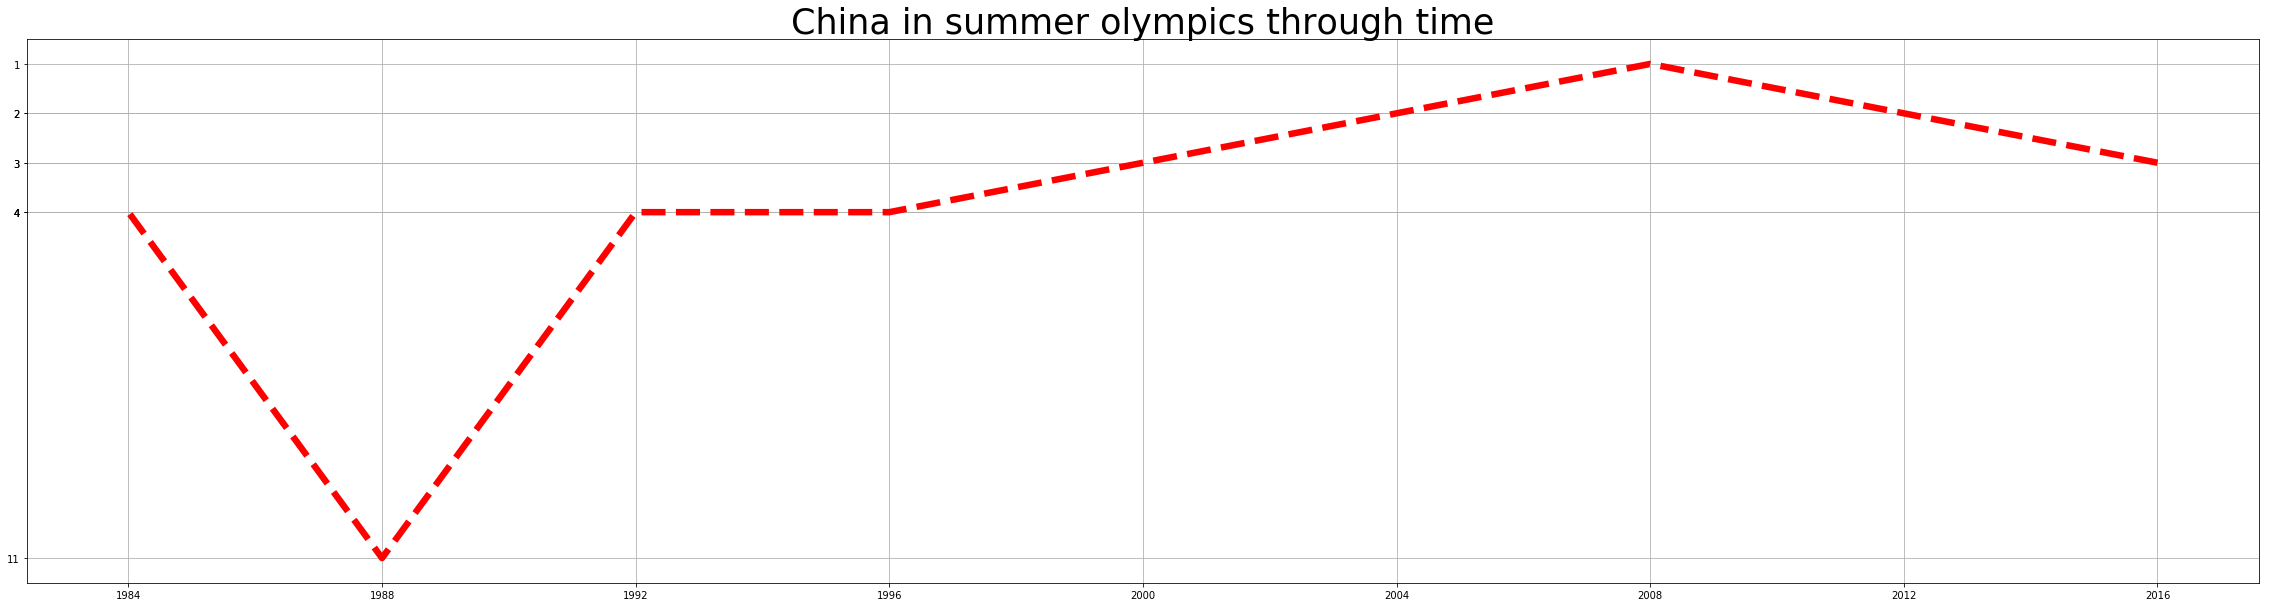

In [31]:
#China
Hist_China=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='CHN']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_China.index,Hist_China.values,'--',color='red',linewidth=6.5)
plt.xticks(Hist_China.index)
plt.yticks(Hist_China.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('China in summer olympics through time',fontsize= 35)
plt.show()

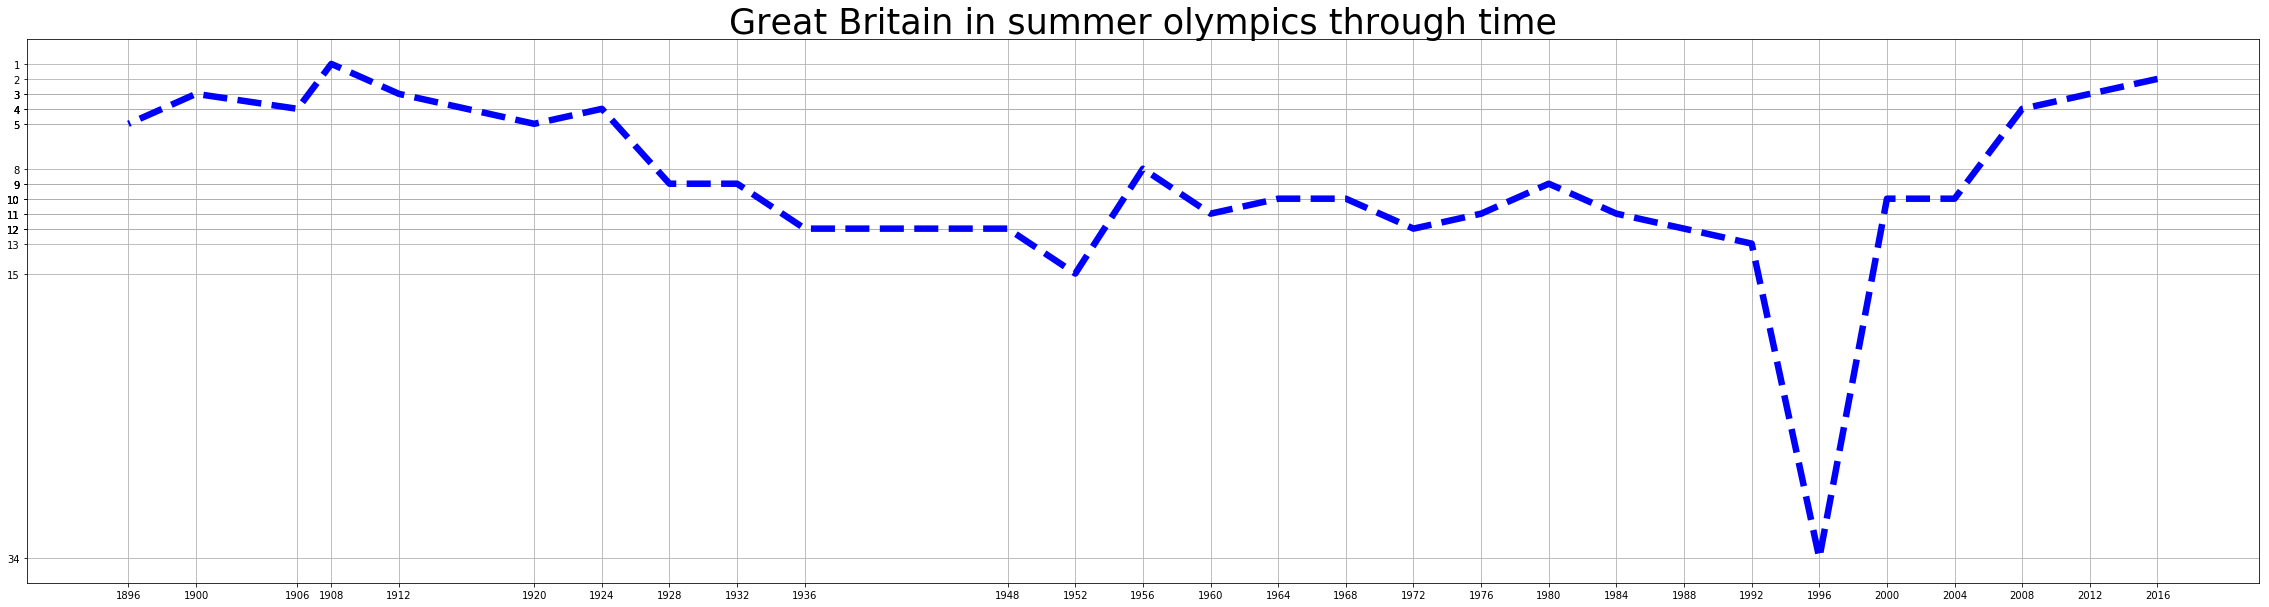

In [32]:
#Great Britain
Hist_GBR=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='GBR']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_GBR.index,Hist_GBR.values,'--',color='blue',linewidth=6.5)
plt.xticks(Hist_GBR.index)
plt.yticks(Hist_GBR.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Great Britain in summer olympics through time',fontsize= 35)
plt.show()

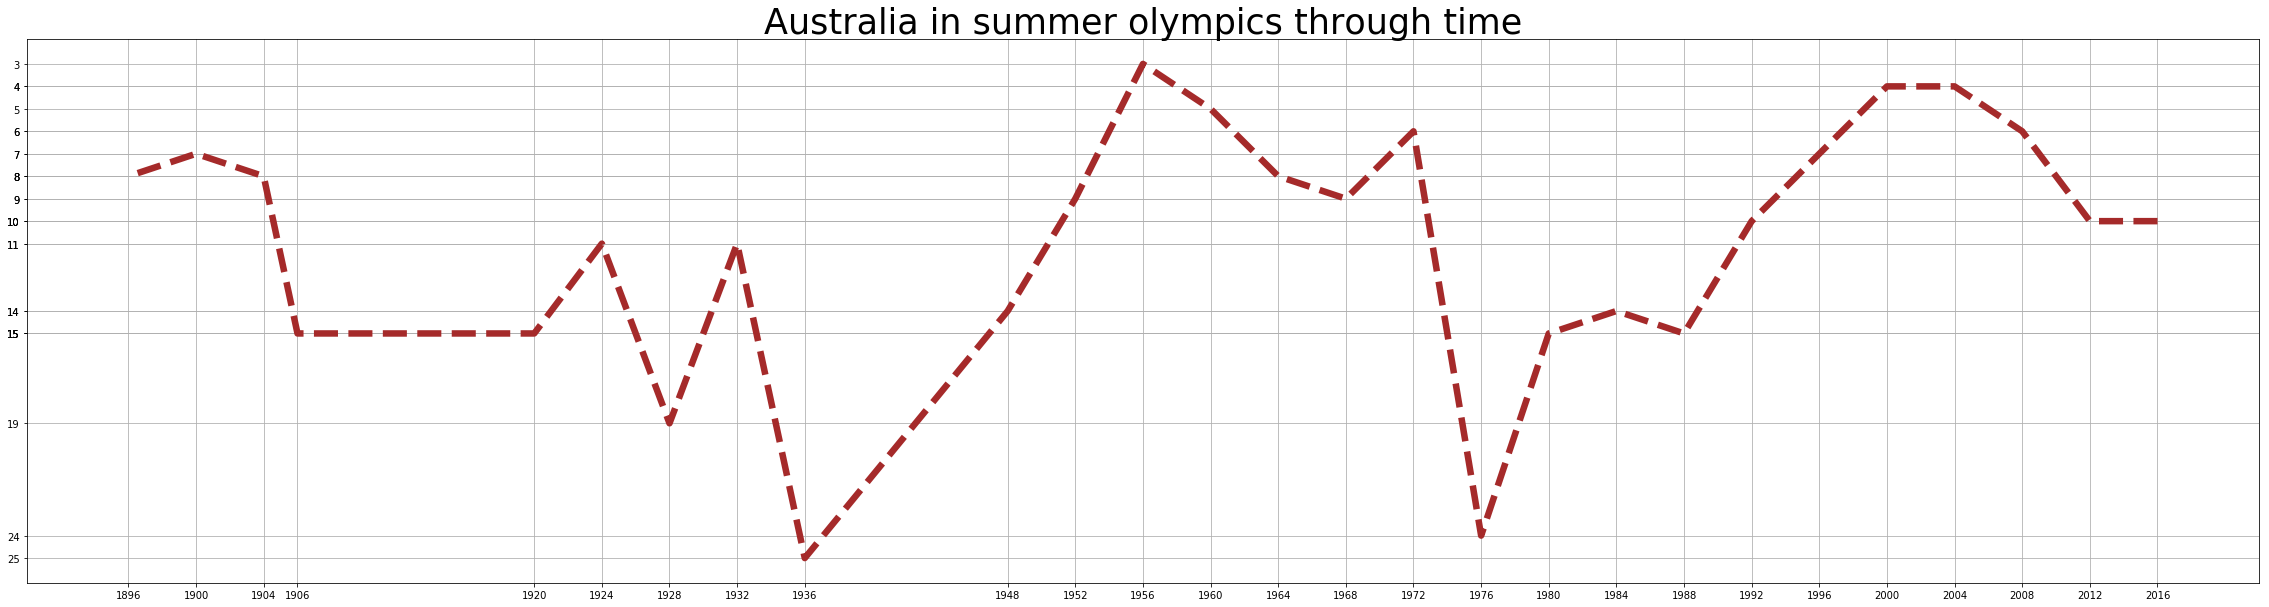

In [33]:
#Australia
Hist_Australia=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='AUS']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_Australia.index,Hist_Australia.values,'--',color='brown',linewidth=6.5)
plt.xticks(Hist_Australia.index)
plt.yticks(Hist_Australia.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Australia in summer olympics through time',fontsize= 35)
plt.show()

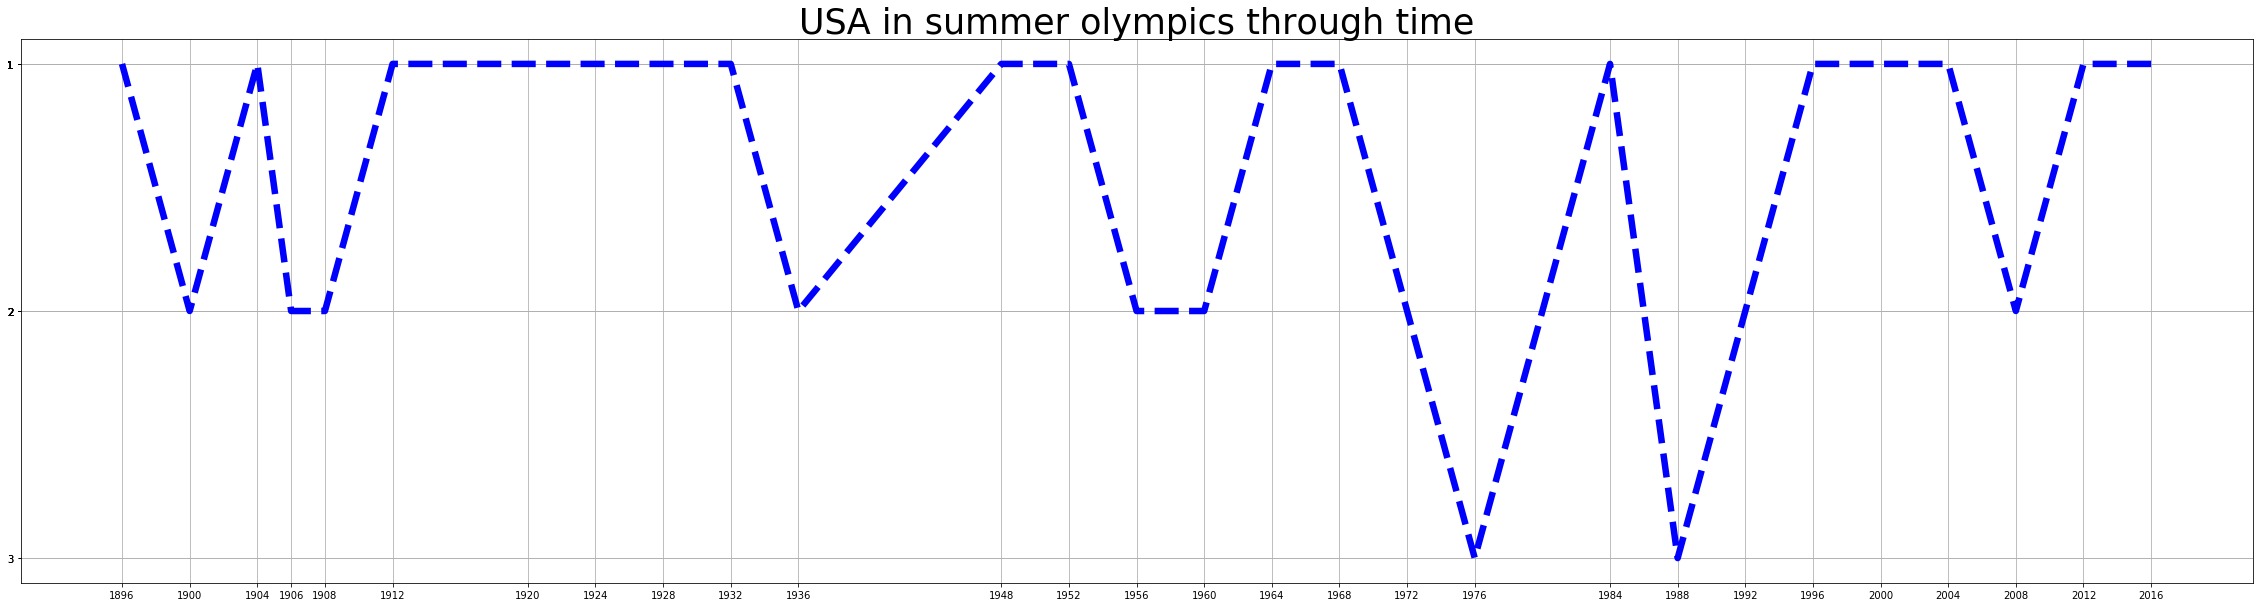

In [34]:
#USA
Hist_USA=(
    medallero_verano_ranking[medallero_verano_ranking['NOC']=='USA']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_USA.index,Hist_USA.values,'--',color='blue',linewidth=6.5)
plt.xticks(Hist_USA.index)
plt.yticks(Hist_USA.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('USA in summer olympics through time',fontsize= 35)
plt.show()

In [35]:
#List of host countries
Paises_organizadores

['Greece',
 'France',
 'United States',
 'Great Britain',
 'Sweden',
 'Belgium',
 'Netherlands',
 'Germany',
 'West Germany',
 'East Germany',
 'Finland',
 'Australia',
 'Italy',
 'Japan',
 'Mexico',
 'Canada',
 'USSR',
 'Russia',
 'South Korea',
 'Spain',
 'China',
 'Brazil']

In [36]:
#Historic performance of all host countries through time
rankings_hist=[]

for pais in pais_org_NOC:
    df_aux=medallero_verano_ranking[medallero_verano_ranking['NOC']==pais].loc[:,['Year','Ranking']]

    years_aux=list(df_aux['Year'])
    lista_aux=[]
    for year in years_lst:
        if(year in years_aux):
            valor=df_aux.loc[df_aux['Year'] == year]['Ranking'].iloc[0]
            lista_aux.append(valor)
        else:
            lista_aux.append(0)
    aux=(pais,lista_aux)
    rankings_hist.append(aux)

In [37]:
#DataFrame with all the hosts and their rankings by year
pd_aux=pd.DataFrame(rankings_hist)
pd_aux.columns=['Country','Positions']
pd_aux
ranking_hosts=pd.DataFrame(pd_aux.Positions.values.tolist(),index=pd_aux.iloc[:,0],columns=list(reversed(years)))

In [38]:
#Fix USSR/RUS and Germany
GER_GDR = ranking_hosts.loc['GER',:]+ranking_hosts.loc['GDR',:]
USSR_RUS = ranking_hosts.loc['USR',:]+ranking_hosts.loc['RUS',:]

## Host's Metric

In [39]:
#Function to calcute host´s of USSR/RUS and Germany
def metricaESP(country,years):
    aux = country
    for year in years:
        aux = aux.drop(year)
    prom = aux.mean()
    rank_host=np.array([])
    for year in years:
        valor=country[year]
        rank_host=np.append(rank_host,valor)
    host_prom=rank_host.mean()
    return prom-host_prom

In [40]:
#Function to calcute host´s metric to all countries expect USSR/RUS and Germany
def metricaHosts(country,years):
    aux = ranking_hosts.loc[country,:]
    for year in years:
        aux = aux.drop(year)
    prom = aux.mean()
    rank_host=np.array([])
    for year in years:
        valor=ranking_hosts.loc[country,year]
        rank_host=np.append(rank_host,valor)
    host_prom=rank_host.mean()
    return country,prom-host_prom

In [41]:
#List with all metrics
metrica=[]
metrica.append(metricaHosts('GRE',[1896,2004]))
metrica.append(metricaHosts('FRA',[1900,1924]))
metrica.append(metricaHosts('USA',[1908,1932,1984,1996]))
metrica.append(metricaHosts('SWE',[1912]))
metrica.append(metricaHosts('BEL',[1920]))
metrica.append(metricaHosts('NED',[1928]))
metrica.append(metricaHosts('GBR',[1908,1948,2012]))
metrica.append(metricaHosts('FIN',[1952]))
metrica.append(metricaHosts('AUS',[1956,2000]))
metrica.append(metricaHosts('ITA',[1960]))
metrica.append(metricaHosts('JPN',[1964]))
metrica.append(metricaHosts('MEX',[1968]))
metrica.append(metricaHosts('CAN',[1976]))
metrica.append(metricaHosts('KOR',[1988]))
metrica.append(metricaHosts('ESP',[1992]))
metrica.append(metricaHosts('CHN',[2008]))
metrica.append(metricaHosts('BRA',[2016]))

In [42]:
#Calculate of the average and std of metric in winter olympics
res= np.array([])
for pais,met in metrica:
    res = np.append(res,met)
    
res = np.append(res,metricaESP(USSR_RUS,[1980]))
res = np.append(res,metricaESP(GER_GDR,[1936,1972]))
print(res)
print(res.std())
print(res.mean())

[ 3.83333333  6.38888889  0.19       11.5        15.5         9.67857143
  3.74358974  7.71428571  7.05555556  3.07142857  4.10714286  2.85714286
 -7.5         3.71428571  2.78571429  0.17857143  0.75        1.17857143
  2.37037037]
4.787326266811587
4.16407643039222
